In [24]:
import sys
from copy import deepcopy 

from izhi2019_wrapper import IzhiCell
from izhi_network import IzhiModularizedNetwork
import matplotlib.pyplot as plt
from utils import *
import numpy as np

%load_ext autoreload
%autoreload 2

%matplotlib qt

print('...done')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
...done


In [25]:
nlayer1, nlayer2 = 10, 10
npermodule_l1, npermodule_l2 = 1, 10

net = IzhiModularizedNetwork(nlayer1, npermodule_l1, nlayer2, npermodule_l2, feedback_layer1=False, feedback_layer2=True)
print('generated network toplogy')

generated network toplogy


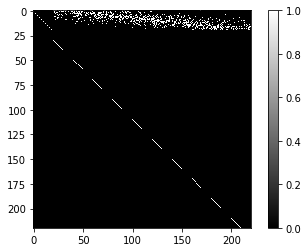

In [3]:
cm = net.get_connectivity_matrix()
plt.figure()
plt.imshow(cm, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [26]:
random = np.random.RandomState(seed=1000)
frequencies = random.normal(20., 1.0, size=(nlayer1,))
scaling = 5.
coupling    = random.uniform(scaling*0.01, scaling*0.05, size=(nlayer1,nlayer1))
for i in xrange(coupling.shape[0]):
    coupling[i,i] = 0.0
steps = 12000.
run_time  = 120.
print(frequencies)
print(coupling)

[19.1955417  20.32093155 19.97451712 20.64432383 19.69920333 20.38947455
 19.8925627  19.52001692 20.5950355  19.53533247]
[[0.         0.19849391 0.12843083 0.0864513  0.19870788 0.06391642
  0.22706744 0.24052888 0.23622869 0.13308619]
 [0.05579633 0.         0.11792754 0.19133744 0.12237541 0.05702118
  0.22101165 0.1814507  0.2031366  0.16081745]
 [0.22701859 0.23083952 0.         0.06491135 0.09892584 0.07666095
  0.18958502 0.12964098 0.22662444 0.0862015 ]
 [0.13649983 0.05362864 0.18828757 0.         0.07564444 0.22826741
  0.23364072 0.0646242  0.05908959 0.13771458]
 [0.17034419 0.11204541 0.18638165 0.09180263 0.         0.16319777
  0.13823348 0.07751123 0.09270864 0.07667438]
 [0.11445934 0.09677742 0.15549963 0.16319423 0.13764506 0.
  0.16192816 0.22306912 0.21945658 0.07156343]
 [0.1132639  0.13189573 0.1874178  0.19044706 0.13923959 0.13406442
  0.         0.15772351 0.2347001  0.06238151]
 [0.12351669 0.24407975 0.18982079 0.22819512 0.10071054 0.19510542
  0.09069889

In [27]:
import time

tmax = 2. # seconds
tic = time.time()
net.instantiate_kuramoto_network(frequencies, coupling, steps, run_time)
elapsed = time.time() - tic
print('kuramoto simulation completed in %0.3f seconds' % elapsed)

tic = time.time()
net.simulate(tmax)
elapsed = time.time() - tic
print('Neurons simulated.. That took %0.3f seconds' % elapsed)

tic = time.time()
net.extract_spike_times(layer=1)
net.extract_spike_times(layer=2)
elapsed = time.time() - tic
print('Acquired spike trains for both layers in %0.3f seconds' % elapsed)

kuramoto simulation completed in 17.220 seconds
Neurons simulated.. That took 34.046 seconds
Acquired spike trains for both layers in 0.246 seconds


In [28]:
l1_cells = get_layer(net.cell_attributes, layer=1)
l2_cells = get_layer(net.cell_attributes, layer=2)

e_cells = get_cell_type(net.cell_attributes, cell_type='e')
i_cells = get_cell_type(net.cell_attributes, cell_type='i')

l1_synch = get_synch_from_voltages(l1_cells)
print('layer 1 synch calculated')
l2_synch = get_synch_from_voltages(l2_cells)
print('layer 2 synch calculated')
e_synch = get_synch_from_voltages(e_cells)
print('excitatory cell synch calculated')
i_synch = get_synch_from_voltages(i_cells)
print('inhibitory cell synch calculated')

layer 1 synch calculated
layer 2 synch calculated
excitatory cell synch calculated
inhibitory cell synch calculated


0.07866465897360651
0.6552177833365375


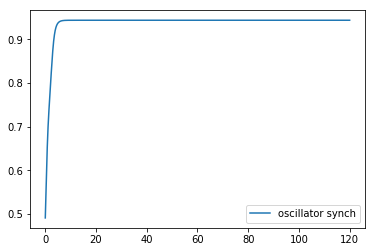

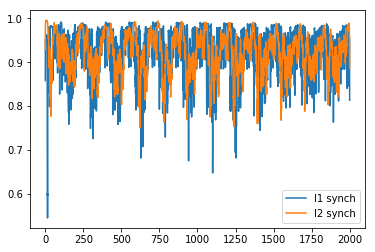

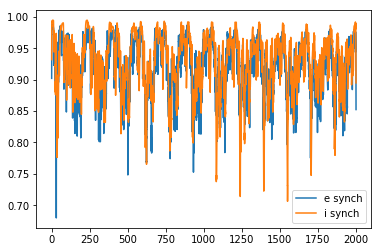

In [29]:
%matplotlib inline


print(np.corrcoef(l1_synch, l2_synch)[0][1])
print(np.corrcoef(e_synch, i_synch)[0][1])

synchrony = net.kuramoto_network['dynamic synchrony']
ktime     = net.kuramoto_network['dynamic time']
plt.figure()
plt.plot(ktime, synchrony, label='oscillator synch')
plt.legend()

plt.figure()
plt.plot(net.kuramoto_sim_time, l1_synch, label='l1 synch')
plt.plot(net.kuramoto_sim_time, l2_synch, label='l2 synch')
plt.legend()

plt.figure()
plt.plot(net.kuramoto_sim_time, e_synch, label='e synch')
plt.plot(net.kuramoto_sim_time, i_synch, label='i synch')
plt.legend()

plt.show()

In [18]:
# Get spike times

cells = net.cell_attributes
simulation_time = net.kuramoto_sim_time
spike_times_l1 = net.spiketrains[1]
spike_times_l2 = net.spiketrains[2]

excitatory_spikes_l1 = get_spikes_from_cell_type(cells, spike_times_l1, cell_type='e')
inhibitory_spikes_l1 = get_spikes_from_cell_type(cells, spike_times_l1, cell_type='i')

excitatory_spikes_l2 = get_spikes_from_cell_type(cells, spike_times_l2, cell_type='e')
inhibitory_spikes_l2 = get_spikes_from_cell_type(cells, spike_times_l2, cell_type='i')
print('done...')

# Get spike times as lists where each entry is a neuron

spike_times_l1_lst = spike_times_l1.values()
spike_times_l2_lst = spike_times_l2.values()

excitatory_spike_times_l1_lst = excitatory_spikes_l1.values()
excitatory_spike_times_l2_lst = excitatory_spikes_l2.values()
inhibitory_spike_times_l1_lst = inhibitory_spikes_l1.values()
inhibitory_spike_times_l2_lst = inhibitory_spikes_l2.values()

excitatory_spike_times_lst = deepcopy(excitatory_spike_times_l1_lst) + deepcopy(excitatory_spike_times_l2_lst)
inhibitory_spike_times_lst = deepcopy(inhibitory_spike_times_l1_lst) + deepcopy(inhibitory_spike_times_l2_lst)

print('done...')


done...
done...


In [19]:

chunk = 25
binned_spikes_l1, binned_times_l1 = bin_activity(simulation_time, spike_times_l1_lst, len(spike_times_l1_lst), dt=0.025, chunk=chunk)
print('layer 1 spikes binned...')
binned_spikes_l2, binned_times_l2 = bin_activity(simulation_time, spike_times_l2_lst, len(spike_times_l2_lst), dt=0.025, chunk=chunk)
print('layer 2 spikes binned...')
binned_spikes_e, binned_times_e = bin_activity(simulation_time, excitatory_spike_times_lst, len(excitatory_spike_times_lst), dt=0.025, chunk=chunk)
print('excitatory spikes binned')
binned_spikes_i, binned_time_i = bin_activity(simulation_time, inhibitory_spike_times_lst, len(inhibitory_spike_times_lst), dt=0.025, chunk=chunk)
print('inhibitory spikes binned')



layer 1 spikes binned...
layer 2 spikes binned...
excitatory spikes binned
inhibitory spikes binned


In [20]:
# Get PSTH for each group

network_activation_l1 = get_PSTH(binned_spikes_l1, len(binned_spikes_l1), chunk/1000., filt=True)
network_activation_l2 = get_PSTH(binned_spikes_l2, len(binned_spikes_l2), chunk/1000., filt=True)
network_activation_e  = get_PSTH(binned_spikes_e, len(binned_spikes_e), chunk/1000., filt=True)
network_activation_i  = get_PSTH(binned_spikes_i, len(binned_spikes_i), chunk/1000., filt=True)
print('done')

done


In [9]:
# get ISIs

l1_ISI_lst, l2_ISI_lst = [], []
e_ISI_lst, i_ISI_lst   = [], []
for spike_times_l1 in spike_times_l1_lst:
    l1_ISI_lst.append(get_ISI(spike_times_l1))
for spike_times_l2 in spike_times_l2_lst:
    l2_ISI_lst.append(get_ISI(spike_times_l2))
for spike_times_e in excitatory_spike_times_lst:
    e_ISI_lst.append(get_ISI(spike_times_e))
for spike_times_i in inhibitory_spike_times_lst:
    i_ISI_lst.append(get_ISI(spike_times_i))
print('done')

done


In [11]:
# get CVs

l1_cv_lst, l2_cv_lst = [], []
e_cv_lst, i_cv_lst   = [], []
for spike_times_l1 in spike_times_l1_lst:
    l1_cv_lst.append(get_CV(spike_times_l1))
for spike_times_l2 in spike_times_l2_lst:
    l2_cv_lst.append(get_CV(spike_times_l2))
for spike_times_e in excitatory_spike_times_lst:
    e_cv_lst.append(get_CV(spike_times_e))
for spike_times_i in inhibitory_spike_times_lst:
    i_cv_lst.append(get_CV(spike_times_i))
    
l1_cv_lst = [x for x in l1_cv_lst if str(x) != 'nan']
l2_cv_lst = [x for x in l2_cv_lst if str(x) != 'nan']
e_cv_lst  = [x for x in e_cv_lst if str(x) != 'nan']
i_cv_lst  = [x for x in i_cv_lst if str(x) != 'nan']
print('done')

done


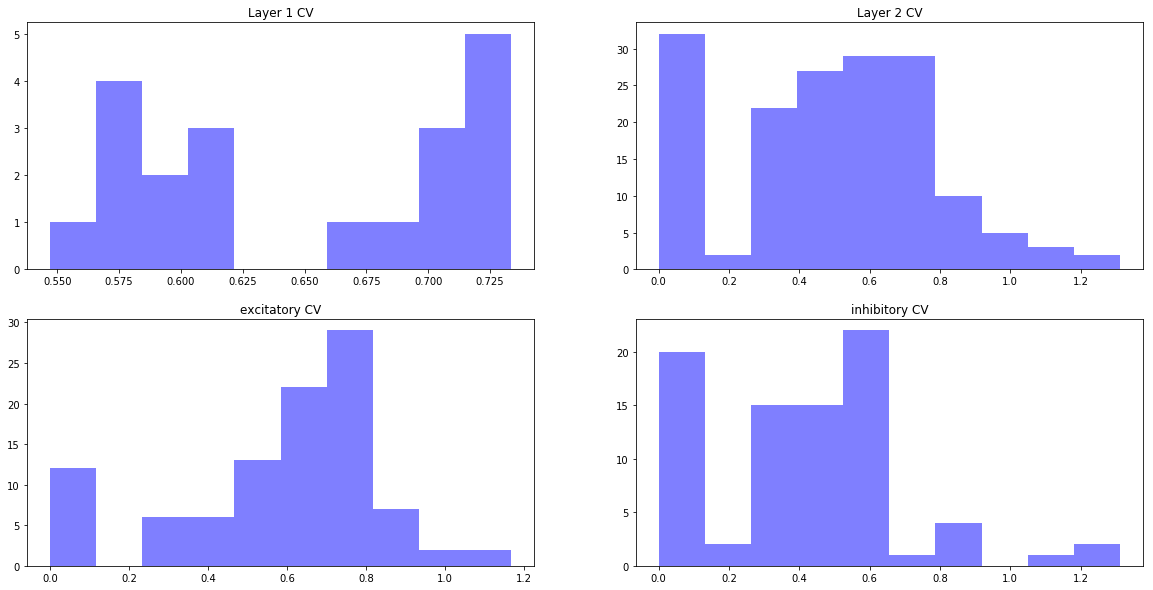

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,10))

ax1.hist(l1_cv_lst, alpha=0.5, color='b')
ax1.set_title('Layer 1 CV')

ax2.hist(l2_cv_lst, alpha=0.5, color='b')
ax2.set_title('Layer 2 CV')

ax3.hist(e_cv_lst, alpha=0.5, color='b')
ax3.set_title('excitatory CV')

ax4.hist(i_cv_lst, alpha=0.5, color='b')
ax4.set_title('inhibitory CV')

plt.show()

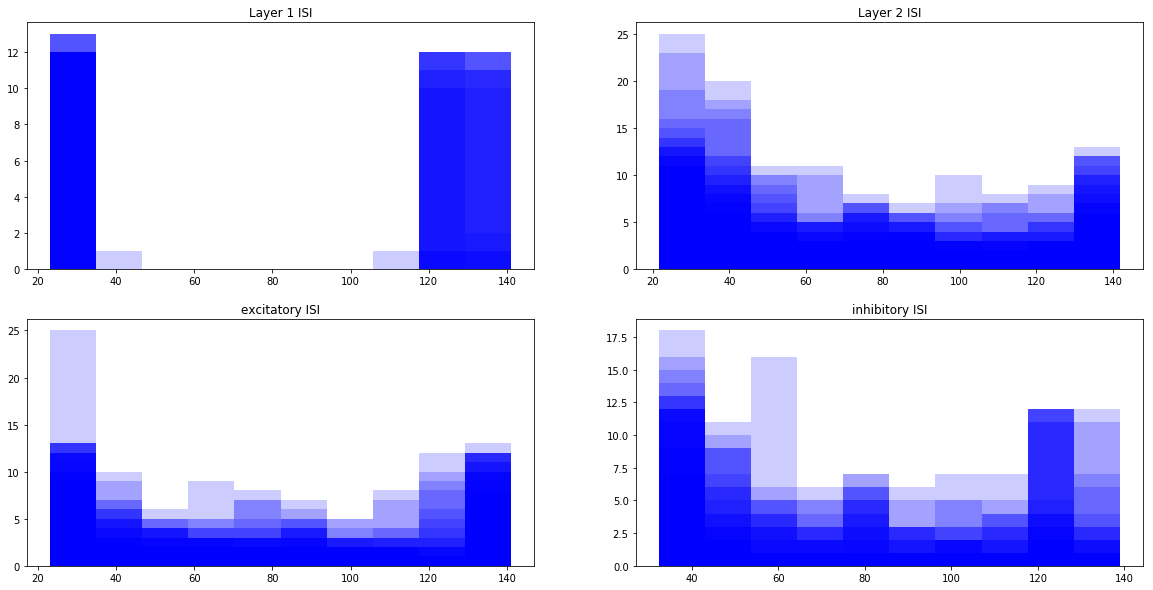

In [13]:
def plot_ISI(ISI_lst, ax, title):
    for (i,ISI) in enumerate(ISI_lst):
        if i == 0:
            _, bins, _ = ax.hist(ISI, alpha=0.2, color='b')
        else:
            ax.hist(ISI, bins=bins, alpha=0.2, color='b')
    ax.set_title(title)
        
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,10))
plot_ISI(l1_ISI_lst, ax1, 'Layer 1 ISI')
plot_ISI(l2_ISI_lst, ax2, 'Layer 2 ISI')
plot_ISI(e_ISI_lst, ax3, 'excitatory ISI')
plot_ISI(i_ISI_lst, ax4, 'inhibitory ISI')

plt.show()


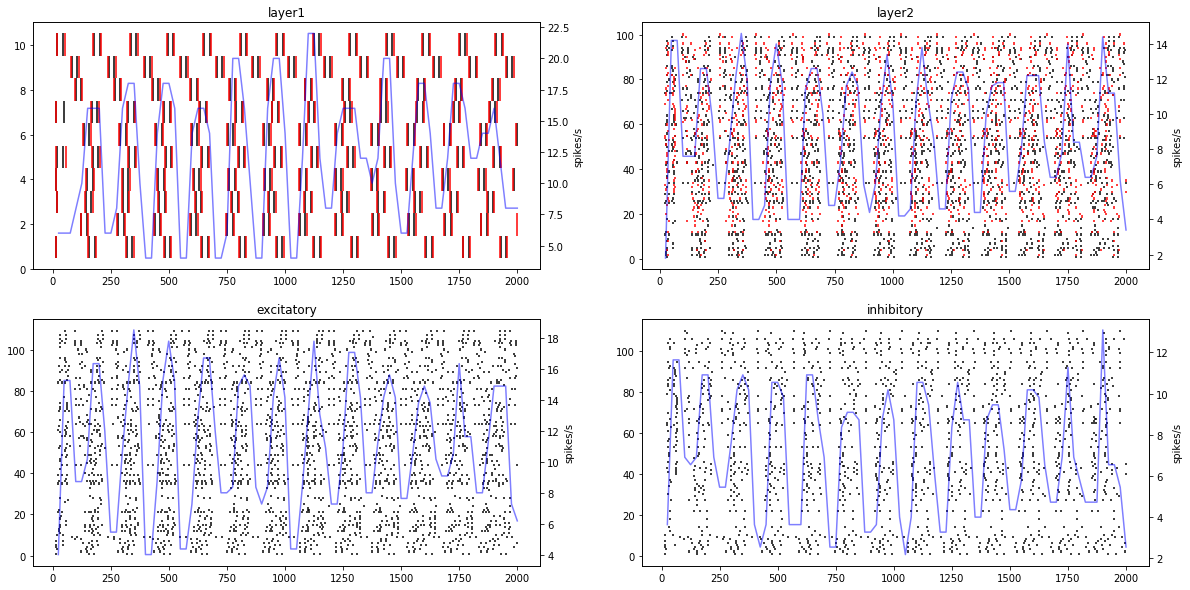

In [21]:
%matplotlib inline

fig, ( (ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,10))
for (i,gid) in enumerate(sorted(excitatory_spikes_l1)):
    ax1.vlines(excitatory_spikes_l1[gid], i + 0.5, i + 1.5, 'black')
for (i,gid) in enumerate(sorted(inhibitory_spikes_l1)):
    ax1.vlines(inhibitory_spikes_l1[gid], i + 0.5, i + 1.5, 'r')
ax1.set_title('layer1')
ax11 = ax1.twinx()
ax11.plot(binned_times_l1, network_activation_l1, 'b', alpha=0.5)
ax11.set_ylabel('spikes/s')

for (i, gid) in enumerate(sorted(excitatory_spikes_l2)):
    ax2.vlines(excitatory_spikes_l2[gid], i + 0.5, i + 1.5, 'black')
for (i, gid) in enumerate(sorted(inhibitory_spikes_l2)):
    ax2.vlines(inhibitory_spikes_l2[gid], i + 0.5, i + 1.5, 'r')
ax22 = ax2.twinx()
ax22.plot(binned_times_l2, network_activation_l2, 'b', alpha=0.5)
ax22.set_ylabel('spikes/s')
ax2.set_title('layer2')


excitatory_spikes_full = excitatory_spikes_l1.copy()
excitatory_spikes_full.update(excitatory_spikes_l2)

inhibitory_spikes_full = inhibitory_spikes_l1.copy()
inhibitory_spikes_full.update(inhibitory_spikes_l2)

for (i,gid) in enumerate(sorted(excitatory_spikes_full)):
    ax3.vlines(excitatory_spikes_full[gid], i + 0.5, i + 1.5, 'black')
ax3.set_title('excitatory')
ax33 = ax3.twinx()
ax33.plot(binned_times_e, network_activation_e, 'b', alpha=0.5)
ax33.set_ylabel('spikes/s')

for (i, gid) in enumerate(sorted(inhibitory_spikes_full)):
    ax4.vlines(inhibitory_spikes_full[gid], i + 0.5, i + 1.5, 'black')
ax4.set_title('inhibitory')
ax44 = ax4.twinx()
ax44.plot(binned_time_i, network_activation_i, 'b', alpha=0.5)
ax44.set_ylabel('spikes/s')
plt.show()